In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [2]:
red_url = 'https://raw.githubusercontent.com/PinkWink/forML_study_data/main/data/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/forML_study_data/main/data/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')
red_wine['color']=1.
white_wine['color']=0.
wine = pd.concat([red_wine, white_wine])
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]
x = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
wine_tree = DecisionTreeClassifier(max_depth=4, random_state=5)
wine_tree.fit(x_train, y_train)
y_pred_tr = wine_tree.predict(x_train)
y_pred_test = wine_tree.predict(x_test)
print('Train Acc    : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc     : ', accuracy_score(y_test, y_pred_test))


Train Acc    :  0.7467769867231094
Test Acc     :  0.73


In [5]:
# Accuracy          : 전체 데이터 중 맞게 예측한 비율
# Precision         : 참이라고 예측한 것 중 참인 비율
# Recall            : 참인 데이터 중 참이라고 예측한 비율
# Fall-out          : 거짓인데 참이라고 예측한 비율
# F1-score          : Precision과 Recall의 조화평균이 높은 값

print('Accuarcy     : ', accuracy_score(y_test, y_pred_test))
print('Recall       : ', recall_score(y_test, y_pred_test))
print('Precision    : ', precision_score(y_test, y_pred_test))
print('AUC score    : ', roc_auc_score(y_test, y_pred_test))
print('F1 score     : ', f1_score(y_test, y_pred_test))

Accuarcy     :  0.73
Recall       :  0.7832080200501254
Precision    :  0.7783312577833126
AUC score    :  0.7143131733716761
F1 score     :  0.7807620237351656


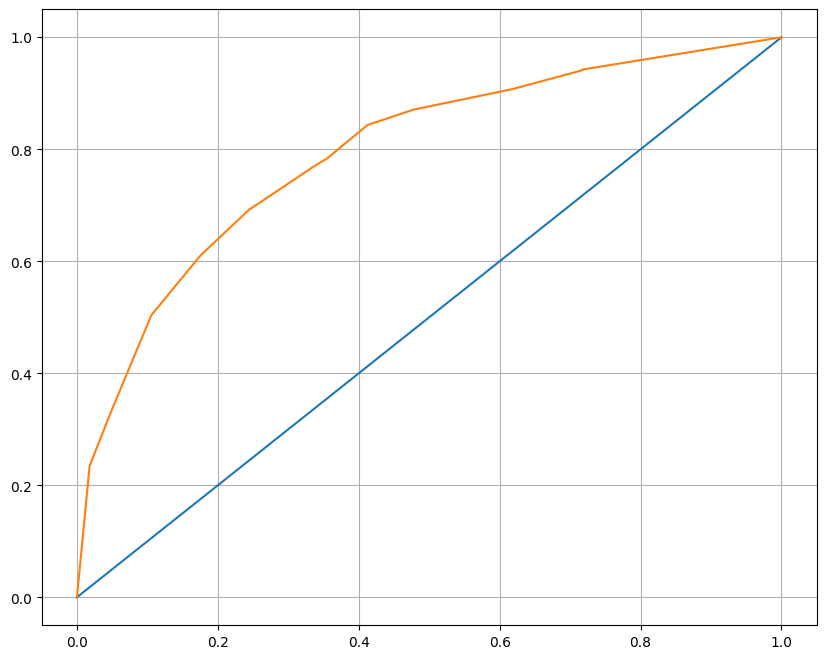

In [4]:
# ROC 곡선, TPR(y)은 Recall, FPR(x)는 Fall-out을 의미한다.
# 직선에 가까울 수록 모델의 성능이 떨어지는 것으로 판단.

pred_proba = wine_tree.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr)
plt.grid()
plt.show()